# Data Science Project

##### Data Wrangling with Python. 

##### Ingesting the data

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None)

In [2]:
# Load the csv into a Pandas Dataframe
df = pd.read_csv(
    "/Users/calebcougle/Documents/Billy Blue: Torrens/Information Tech/IDS201/IDS102_M12_COUGLE_C_FINAL_REPORT/aviation_dataset_a3.csv"
)
df.head(20)

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.
5,5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,...,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 05:00:00,United Air Lines Inc.
6,6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,...,507,N516JB,EWR,FLL,158.0,1065,6,0,2013-01-01 06:00:00,JetBlue Airways
7,7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,...,5708,N829AS,LGA,IAD,53.0,229,6,0,2013-01-01 06:00:00,ExpressJet Airlines Inc.
8,8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,...,79,N593JB,JFK,MCO,140.0,944,6,0,2013-01-01 06:00:00,JetBlue Airways
9,9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,...,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01 06:00:00,American Airlines Inc.


# Data Exploration 
#### Relevant Information about the dataset:
- dep_time: The actual time the flight departured (recorded in 24hr time).
- sched_dep_time: The scheduled departure time (recorded in 24hr time).
- arr_time: The actual time the flight (recorded in 24hr time).
- sched_arr_time: The time the flight was scheduled to arrive (recorded in 24hr time).
- dep_delay: The delay in minutes. Negative int indicates minutes early.
- arr_delay: The delay in minutes. Negative int indicates minutes early.
- flight: Flight number
- tailnum: The unique identification number assigned to the aircraft
- origin: Airport code of origin
- dest: Airport code of destination
- air_time: Time from aircraft wheels up to to touchdown
- distance: Distance in miles
- name: Airline company

#### Handling missing values:
- dep time, dep_delay, arr_time, arr_delay, tailnum, air_time have null values
##### Cancelled Flights (cxxd_flights)
- dep_time and dep_delay have the same number of missing values. This could be  explained by:
    -  cancelled flights being recorded as 0
- Filtering the dataset, a pattern of null in dep_time, airtime, arr_time_dep delay, we can assume this flight has been cancelled. A portion of these flights were slected at random and cross checked online and are indeed cancelled.
- A column will be added later (is_cxxd)


In [3]:
# air_time remaining = 1175
# arr_delay = 458 null
print(df.isna().sum())
print(9430 - 8255)

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64
1175


##### Zero delay (On-time)
- Departures and arrivals considered on-time (0 minutes) are recorded as 0.
- Compare dep_delay and arr_delay for Id 838 (cancelled) and id 336647 (ontime). 

In [4]:
check = df.loc[(df["id"] == 336647) | (df["id"] == 838)]
check

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
838,838,2013,1,1,NaN,1630,NaN,NaN,1815,NaN,...,4308,N18120,EWR,RDU,NaN,416,16,30,2013-01-01 16:00:00,ExpressJet Airlines Inc.
336647,336647,2013,9,30,1930.0,1930,0.0,2217.0,2231,-14.0,...,1435,N365NB,LGA,TPA,133.0,1010,19,30,2013-09-30 19:00:00,Delta Air Lines Inc.


### Descriptive statistics
- Count of flights: 336776
- All flights in 2013
- dep_time, dep_delay missing values are cxxd flights 
- arr_time has a further 458 missing values and arr delay has a further 1175

In [5]:
cxxd_flts = df.loc[
    (df["dep_time"].isnull() & df["dep_delay"].isnull() & df["air_time"].isnull())
]
print(cxxd_flts.head(10))

        id  year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
838    838  2013      1    1       NaN            1630        NaN       NaN   
839    839  2013      1    1       NaN            1935        NaN       NaN   
840    840  2013      1    1       NaN            1500        NaN       NaN   
841    841  2013      1    1       NaN             600        NaN       NaN   
1777  1777  2013      1    2       NaN            1540        NaN       NaN   
1778  1778  2013      1    2       NaN            1620        NaN       NaN   
1779  1779  2013      1    2       NaN            1355        NaN       NaN   
1780  1780  2013      1    2       NaN            1420        NaN       NaN   
1781  1781  2013      1    2       NaN            1321        NaN       NaN   
1782  1782  2013      1    2       NaN            1545        NaN       NaN   

      sched_arr_time  arr_delay  ... flight  tailnum origin dest air_time  \
838             1815        NaN  ...   4308   N18120 

In [6]:
df.describe()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.000000,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,168387.500000,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,97219.001466,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,0.000000,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,84193.750000,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,168387.500000,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,252581.250000,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,336775.000000,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [7]:
total = 327346 + 8255
print(336776 - total)

1175


In [8]:
df.head(2)

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.


In [9]:
carriers = df.groupby("name")["id"].size()  # <-- size returns all even null
carriers

name
AirTran Airways Corporation     3260
Alaska Airlines Inc.             714
American Airlines Inc.         32729
Delta Air Lines Inc.           48110
Endeavor Air Inc.              18460
Envoy Air                      26397
ExpressJet Airlines Inc.       54173
Frontier Airlines Inc.           685
Hawaiian Airlines Inc.           342
JetBlue Airways                54635
Mesa Airlines Inc.               601
SkyWest Airlines Inc.             32
Southwest Airlines Co.         12275
US Airways Inc.                20536
United Air Lines Inc.          58665
Virgin America                  5162
Name: id, dtype: int64

In [10]:
df.groupby("name")[["arr_delay", "dep_delay", "distance"]].aggregate(
    ["min", "max", "size", "mean", "median", "std"]
)

arr_delay                                   \
                                  min     max   size       mean median   
name                                                                     
AirTran Airways Corporation     -44.0   572.0   3260  20.115906    5.0   
Alaska Airlines Inc.            -74.0   198.0    714  -9.930889  -17.0   
American Airlines Inc.          -75.0  1007.0  32729   0.364291   -9.0   
Delta Air Lines Inc.            -71.0   931.0  48110   1.644341   -8.0   
Endeavor Air Inc.               -68.0   744.0  18460   7.379669   -7.0   
Envoy Air                       -53.0  1127.0  26397  10.774733   -1.0   
ExpressJet Airlines Inc.        -62.0   577.0  54173  15.796431   -1.0   
Frontier Airlines Inc.          -47.0   834.0    685  21.920705    6.0   
Hawaiian Airlines Inc.          -70.0  1272.0    342  -6.915205  -13.0   
JetBlue Airways                 -71.0   497.0  54635   9.457973   -3.0   
Mesa Airlines Inc.              -46.0   381.0    601  15.556985   -2.0   
SkyWest Airlines Inc.           -26.0   157.0     32  11.931034   -7.0   
Southwest Airlines Co.          -58.0   453.0  12275   9.649120   -3.0   
US Airways Inc.                 -70.0   492.0  20536   2.129595   -6.0   
United Air Lines Inc.           -75.0   455.0  58665   3.558011   -6.0   
Virgin America                  -86.0   676.0   5162   1.764464   -9.0   

                                       dep_delay                            \
                                   std       min     max   size       mean   
name                                                                         
AirTran Airways Corporation  54.087671     -22.0   602.0   3260  18.726075   
Alaska Airlines Inc.         36.482633     -21.0   225.0    714   5.804775   
American Airlines Inc.       42.516182     -24.0  1014.0  32729   8.586016   
Delta Air Lines Inc.         44.402289     -33.0   960.0  48110   9.264505   
Endeavor Air Inc.            50.086778     -24.0   747.0  18460  16.725769   
Envoy Air                    43.174306     -26.0  1137.0  26397  10.552041   
ExpressJet Airlines Inc.     49.861469     -32.0   548.0  54173  19.955390   
Frontier Airlines Inc.       61.645997     -27.0   853.0    685  20.215543   
Hawaiian Airlines Inc.       75.129420     -16.0  1301.0    342   4.900585   
JetBlue Airways              42.842297     -43.0   502.0  54635  13.022522   
Mesa Airlines Inc.           52.922234     -16.0   387.0    601  18.996330   
SkyWest Airlines Inc.        48.584926     -14.0   154.0     32  12.586207   
Southwest Airlines Co.       46.877702     -13.0   471.0  12275  17.711744   
US Airways Inc.              33.066952     -19.0   500.0  20536   3.782418   
United Air Lines Inc.        40.984344     -20.0   483.0  58665  12.106073   
Virgin America               49.966450     -20.0   653.0   5162  12.869421   

                                              distance               \
                            median        std      min   max   size   
name                                                                  
AirTran Airways Corporation    1.0  52.661600      397   762   3260   
Alaska Airlines Inc.          -3.0  31.363032     2402  2402    714   
American Airlines Inc.        -3.0  37.354861      187  2586  32729   
Delta Air Lines Inc.          -2.0  39.735052       94  2586  48110   
Endeavor Air Inc.             -2.0  45.906038       94  1587  18460   
Envoy Air                     -3.0  39.184566      184  1147  26397   
ExpressJet Airlines Inc.      -1.0  46.552354       80  1389  54173   
Frontier Airlines Inc.         0.5  58.362648     1620  1620    685   
Hawaiian Airlines Inc.        -4.0  74.109901     4983  4983    342   
JetBlue Airways               -1.0  38.503368      173  2586  54635   
Mesa Airlines Inc.            -2.0  49.172266       96   544    601   
SkyWest Airlines Inc.         -6.0  43.065994      229  1008     32   
Southwest Airlines Co.         1.0  43.344355      169  2133  12275   
US

In [11]:
df.groupby("origin")[
    [
        "arr_delay",
        "dep_delay",
    ]
].aggregate(["min", "max", "size", "mean", "median", "std"])

arr_delay                                             dep_delay  \
             min     max    size      mean median        std       min   
origin                                                                   
EWR        -86.0  1109.0  120835  9.107055   -4.0  45.529183     -25.0   
JFK        -79.0  1272.0  111279  5.551481   -6.0  44.277448     -43.0   
LGA        -68.0   915.0  104662  5.783488   -5.0  43.862273     -33.0   

                                                     
           max    size       mean median        std  
origin                                               
EWR     1126.0  120835  15.107954   -1.0  41.323704  
JFK     1301.0  111279  12.112159   -1.0  39.035071  
LGA      911.0  104662  10.346876   -3.0  39.993021

### Exploring the Dataset with Visualisations
Findings: 
- 2013 is the year of all of the flights
- 

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'dep_time'}>,
        <Axes: title={'center': 'sched_dep_time'}>,
        <Axes: title={'center': 'dep_delay'}>,
        <Axes: title={'center': 'arr_time'}>],
       [<Axes: title={'center': 'sched_arr_time'}>,
        <Axes: title={'center': 'arr_delay'}>,
        <Axes: title={'center': 'flight'}>,
        <Axes: title={'center': 'air_time'}>],
       [<Axes: title={'center': 'distance'}>,
        <Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'minute'}>, <Axes: >]], dtype=object)

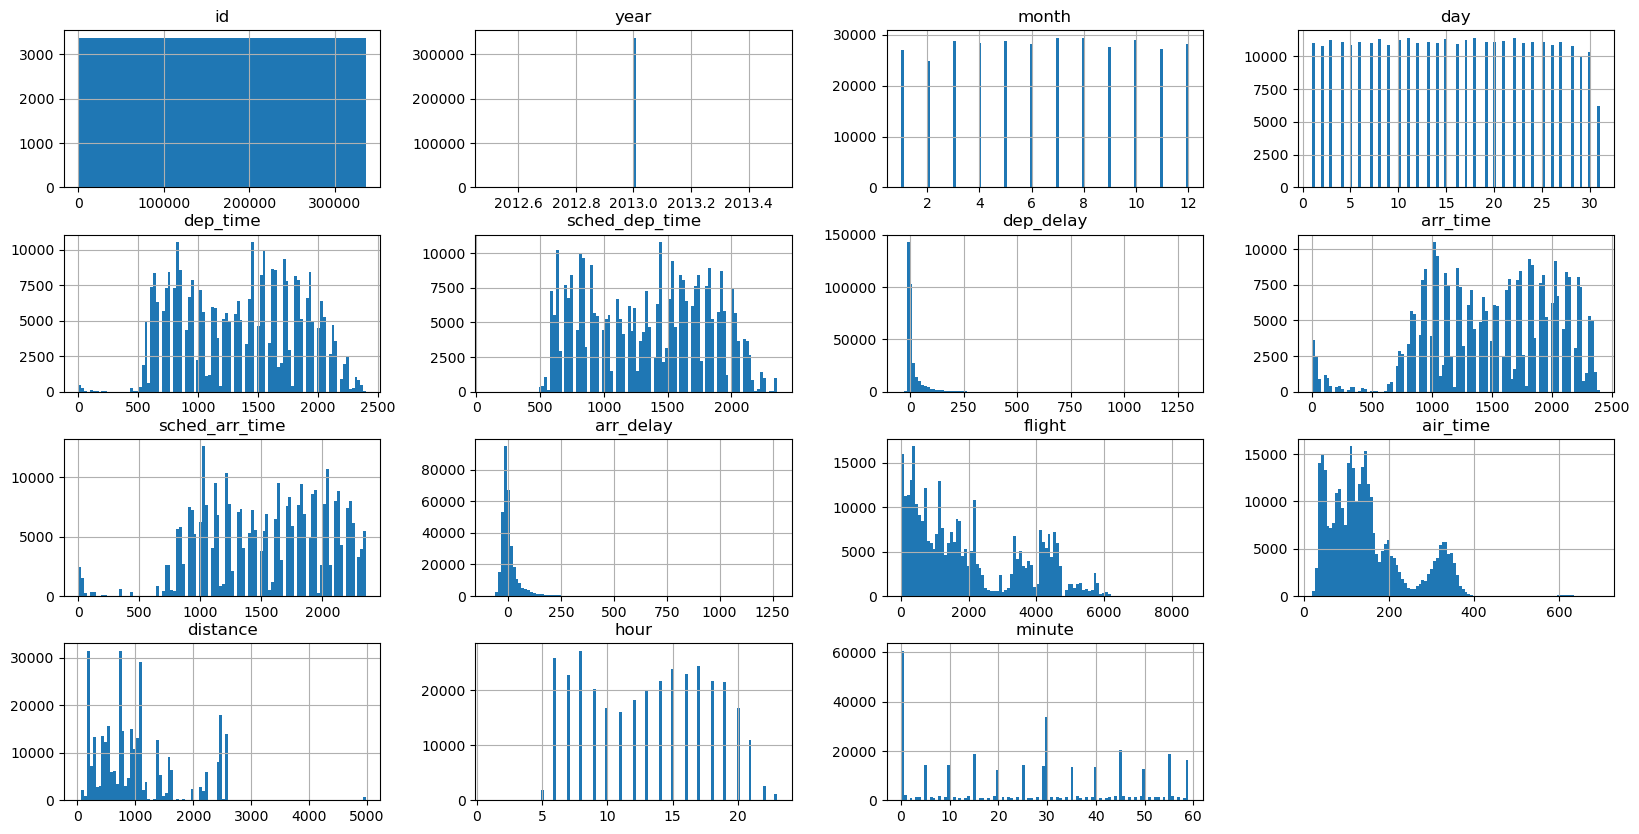

In [12]:
# Early exploration of data
df.hist(bins=100, figsize=(20, 10))

<Axes: xlabel='sched_arr_time', ylabel='Count'>

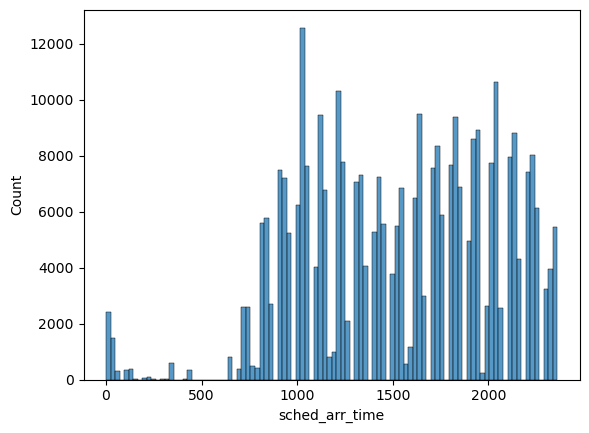

In [13]:
import seaborn as sns
sns.histplot(data=df, x="sched_arr_time", multiple="stack")

In [14]:
# For the purpose of this study, delay will be considered any arr_delay > 15
# of the N number of flights, 80100. have an arrival time delay of 15 mins or more.
is_delayed = df[df["arr_delay"] >= 15]
is_delayed.describe()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,80100.000000,80100.0,80100.000000,80100.000000,80100.000000,80100.000000,80100.000000,80100.000000,80100.000000,80100.000000,80100.000000,80100.000000,80100.000000,80100.000000,80100.000000
mean,170636.899576,2013.0,6.472185,15.751248,1558.294332,1500.443184,54.577241,1588.766854,1666.763333,62.558327,2116.535481,150.219326,1010.110699,14.731685,27.274644
std,91550.093769,0.0,3.396199,8.505052,484.367988,434.605908,63.395104,645.147107,499.261386,58.942293,1705.461871,92.624026,706.719625,4.343360,19.012777
min,1.000000,2013.0,1.000000,1.000000,1.000000,500.000000,-43.000000,1.000000,1.000000,15.000000,1.000000,20.000000,80.000000,5.000000,0.000000
25%,95390.750000,2013.0,4.000000,9.000000,1227.000000,1200.000000,11.000000,1237.000000,1334.000000,24.000000,575.000000,83.000000,502.000000,12.000000,10.000000
50%,176276.000000,2013.0,6.000000,16.000000,1637.000000,1556.000000,38.000000,1757.000000,1757.000000,42.000000,1600.000000,129.000000,765.000000,15.000000,29.000000
75%,250209.250000,2013.0,9.000000,23.000000,1933.000000,1835.000000,76.000000,2104.000000,2045.000000,79.000000,3811.000000,187.000000,1325.000000,18.000000,45.000000
max,336763.000000,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


<Axes: xlabel='id', ylabel='arr_delay'>

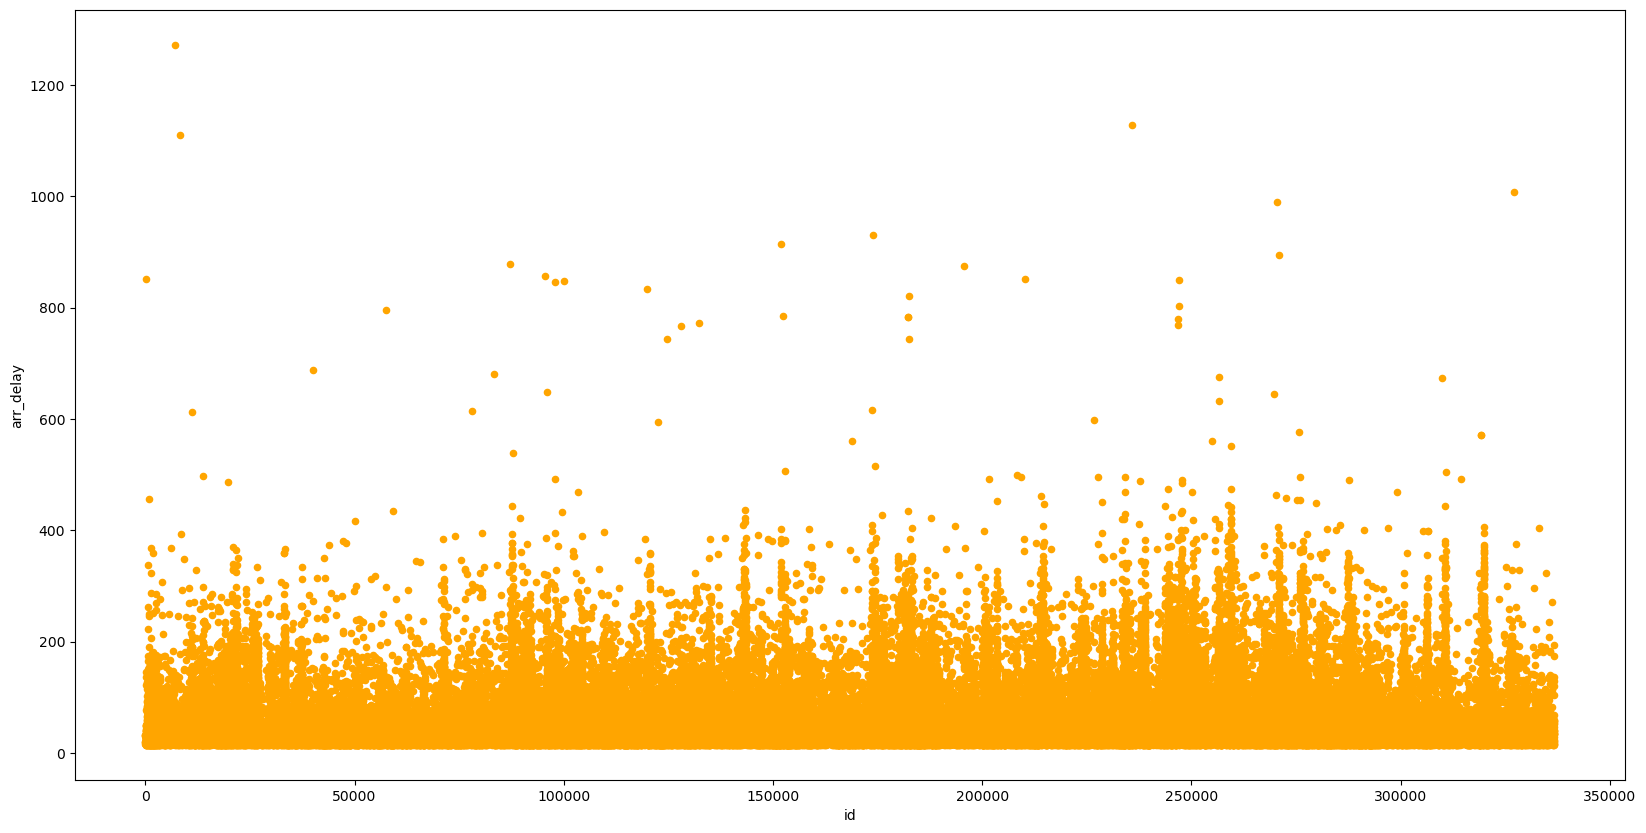

In [15]:
is_delayed[["id", "arr_delay"]].plot(
    kind="scatter", y="arr_delay", x="id", color="orange", figsize=(20, 10)
)

<Axes: xlabel='name'>

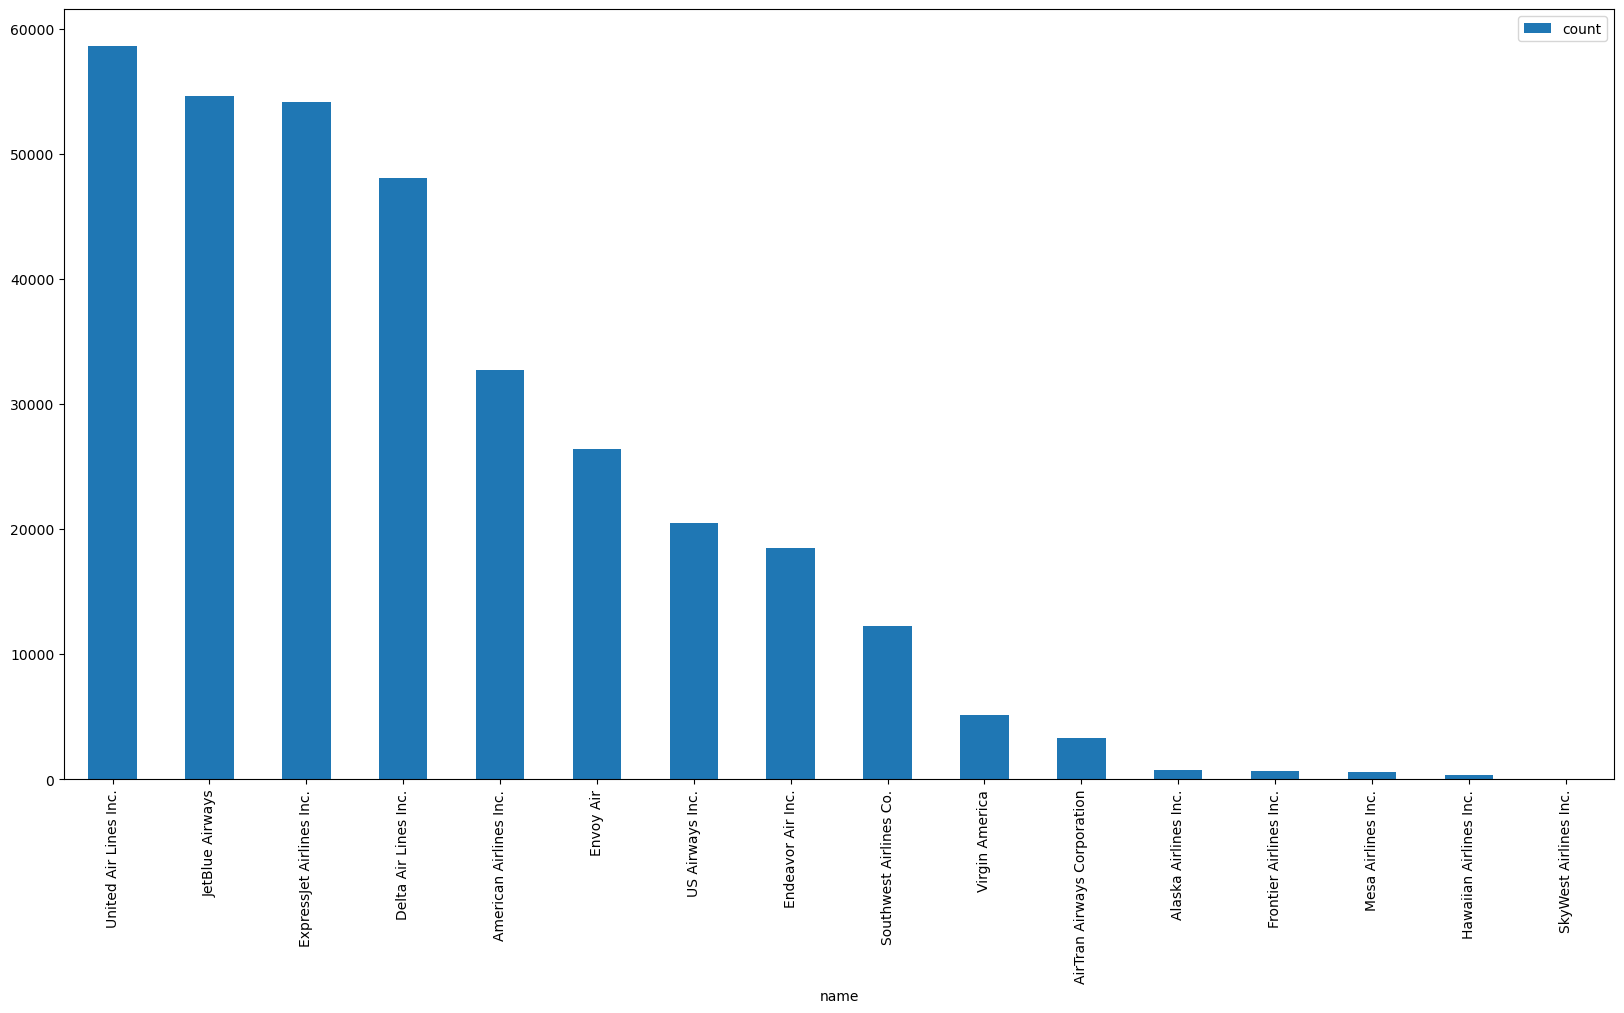

In [16]:
# The distribution of the data
#!!! Use a cumulative bar with delays
pd.DataFrame(df["name"].value_counts()).plot(kind="bar", figsize=(20, 10))

<Axes: xlabel='name'>

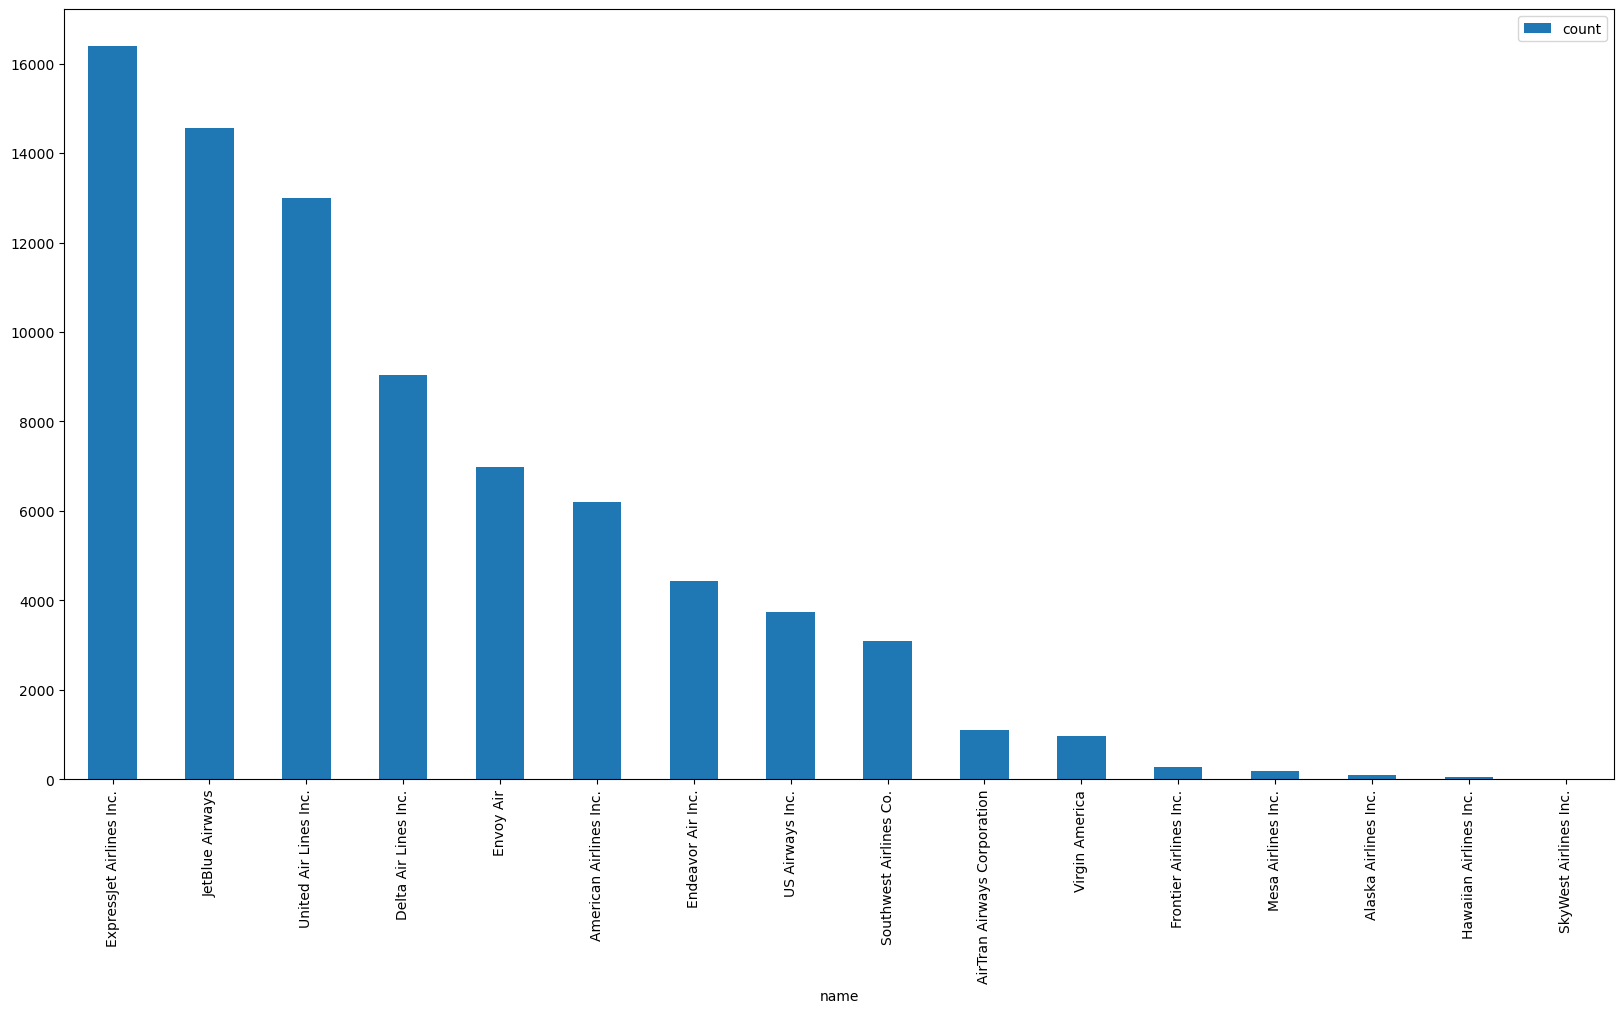

In [17]:
# The distribution of the delays
pd.DataFrame(is_delayed["name"].value_counts()).plot(kind="bar", figsize=(20, 10))

<Axes: xlabel='origin'>

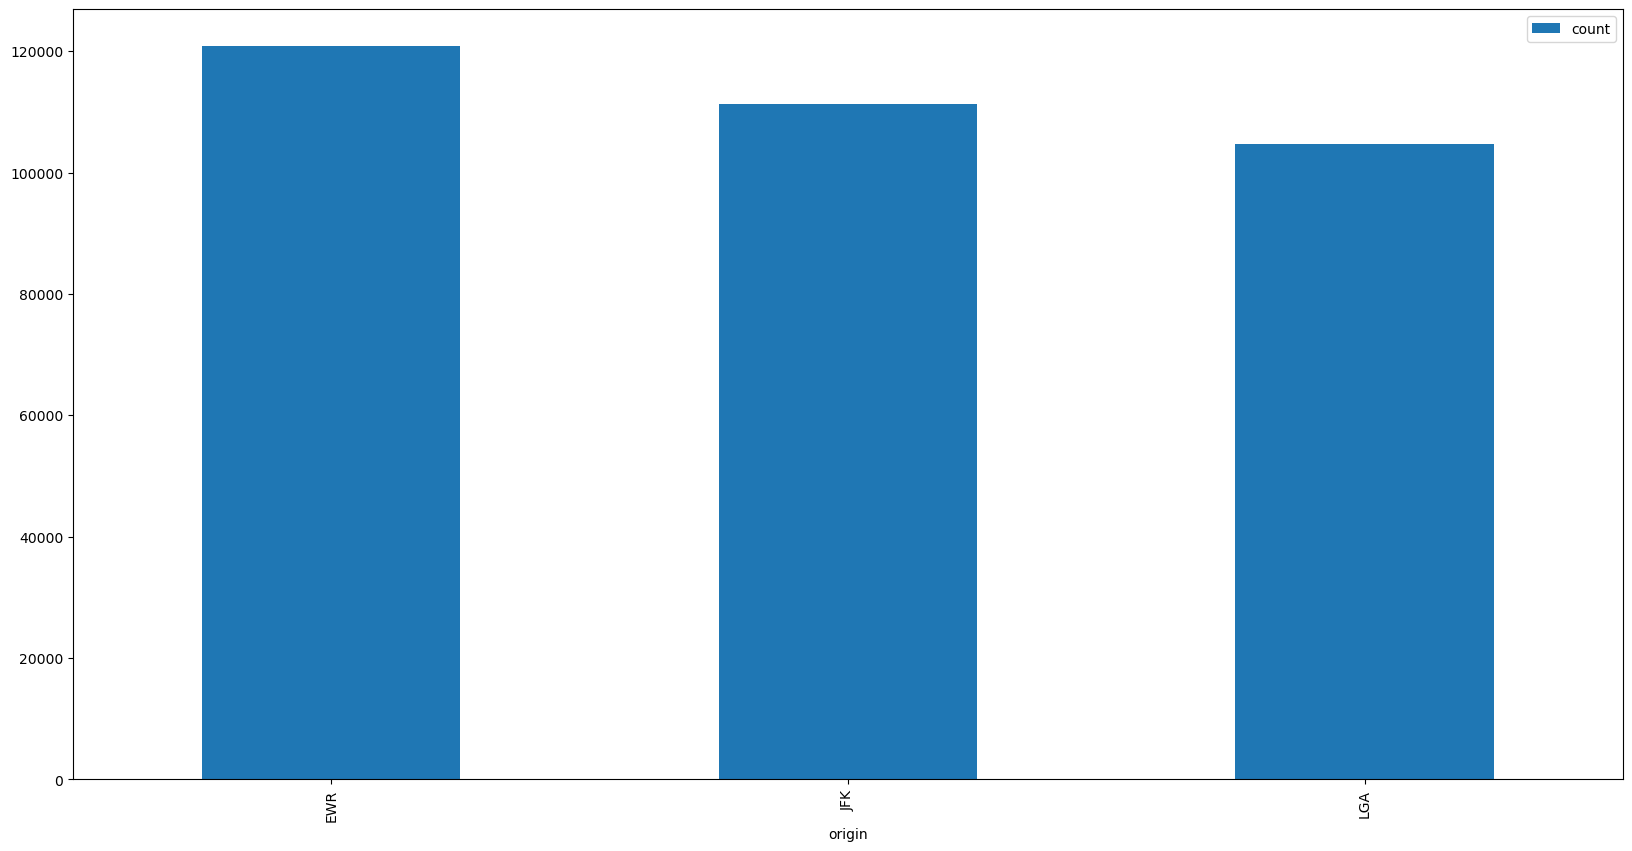

In [18]:
# The dataset only records flights:
# EX EWR
# EX JFK
# EX LGA
pd.DataFrame(df["origin"].value_counts()).plot(kind="bar", figsize=(20, 10))

<Axes: xlabel='dest'>

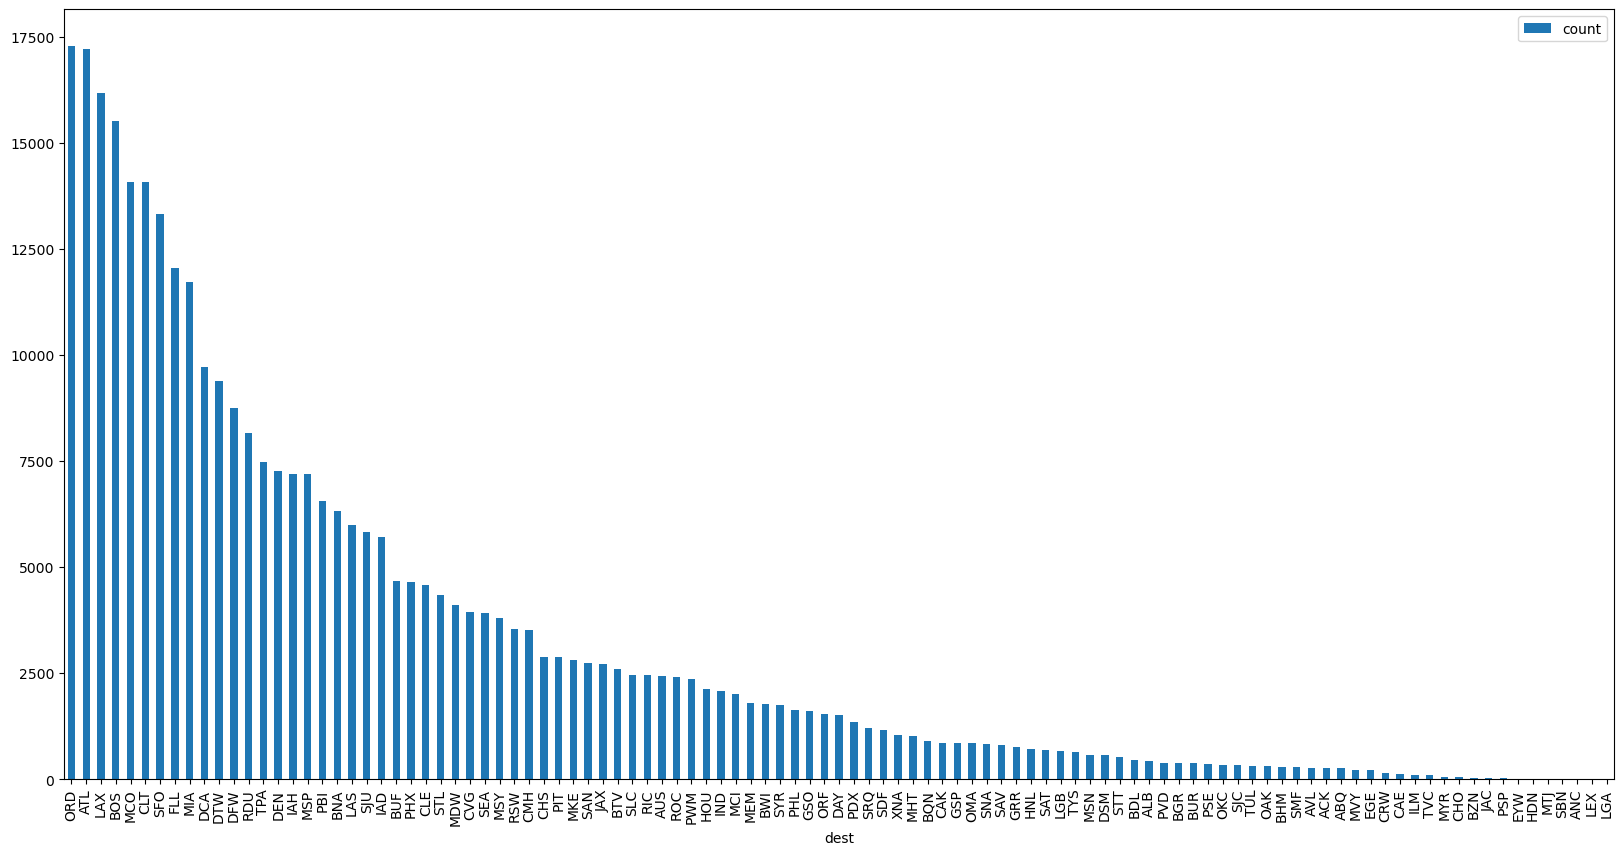

In [19]:
# With multiple dest
pd.DataFrame(df["dest"].value_counts()).plot(kind="bar", figsize=(20, 10))

<Axes: xlabel='month'>

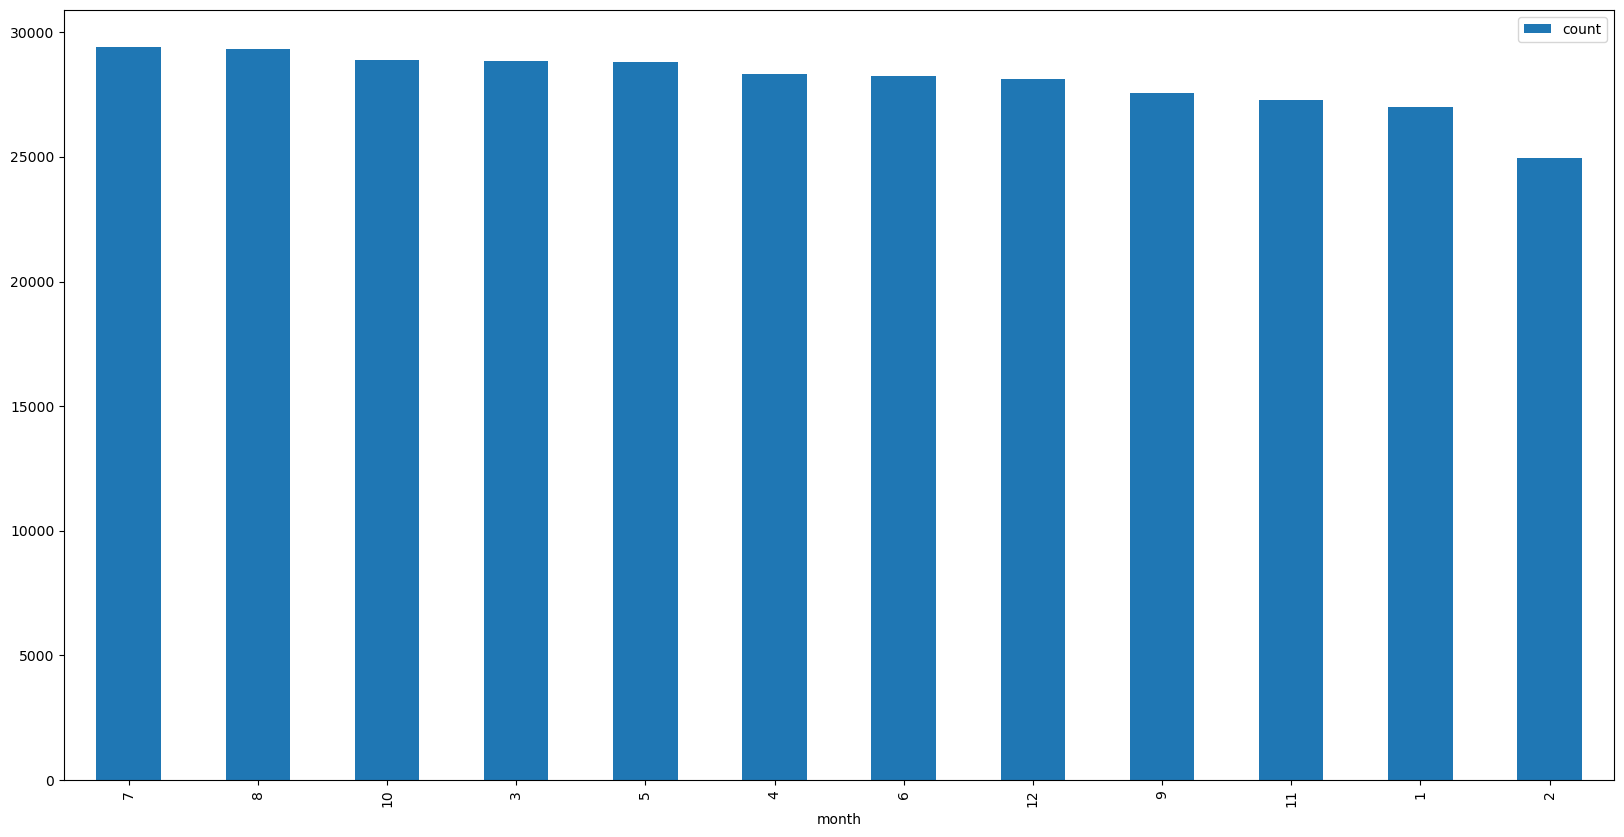

In [20]:
pd.DataFrame(df["month"].value_counts()).plot(kind="bar", figsize=(20, 10))

<Axes: xlabel='month'>

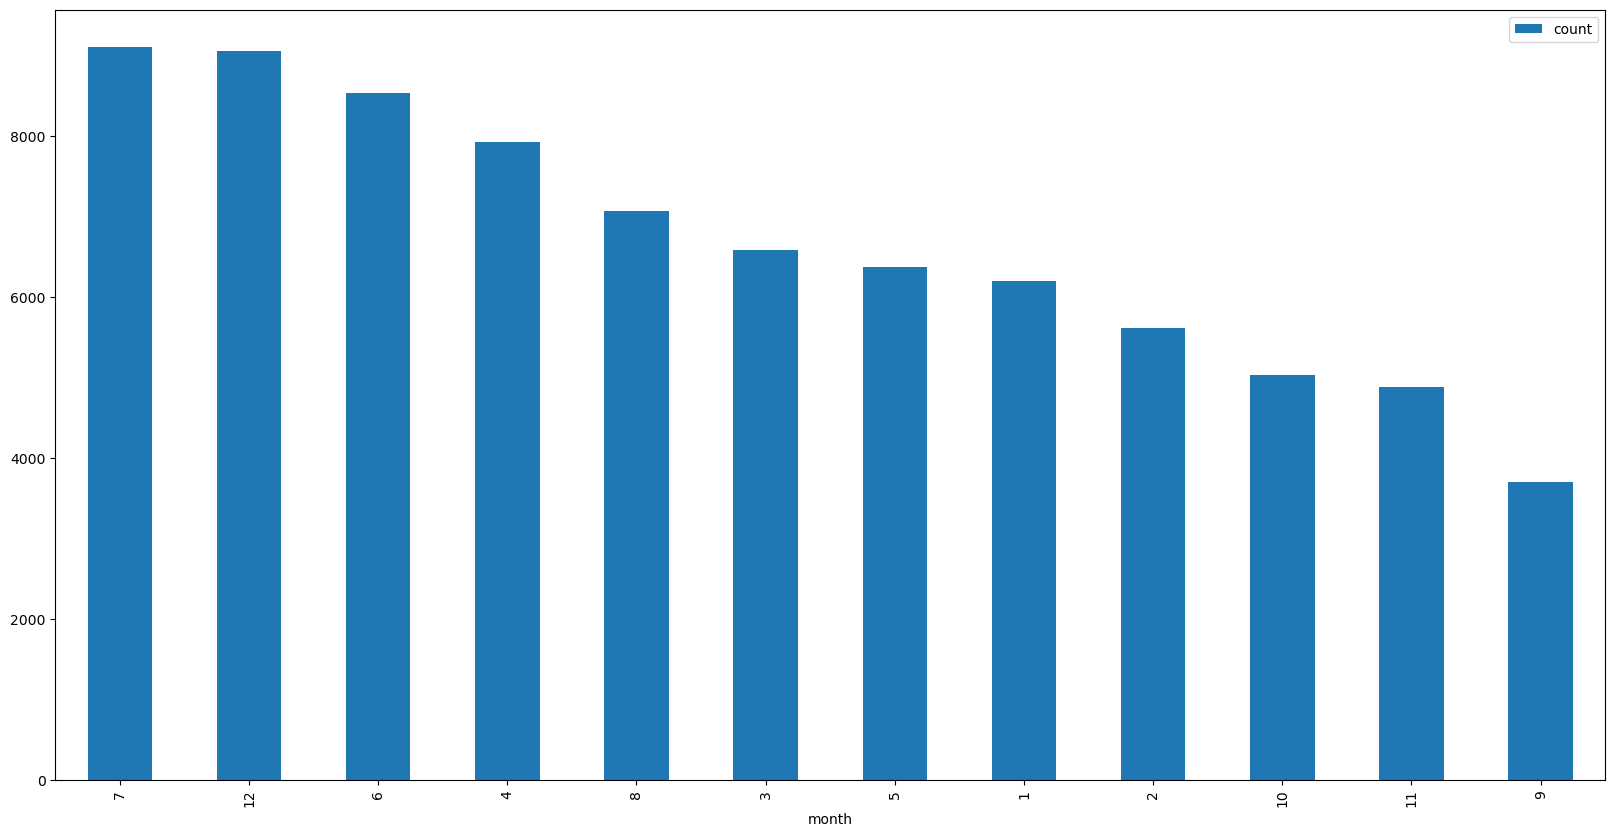

In [21]:
pd.DataFrame(is_delayed["month"].value_counts()).plot(kind="bar", figsize=(20, 10))

There are some missing values in this data. The missing values are from variables that imply the are related to canceled flights. Further exploration is required to handle the missing values. 

        dep_delay    arr_delay     distance
mean    12.639071     6.895377  1039.912476
50%     -2.000000    -5.000000   872.000000
std     40.222488    44.626251   733.209106
min    -43.000000   -86.000000    17.000000
max   1301.000000  1272.000000  4983.000000


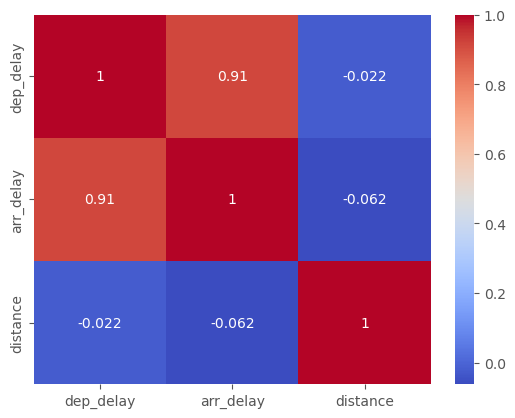

In [45]:
# Focus on key summary statistics
summary_stats = dfn[['dep_delay', 'arr_delay', 'distance']].describe().loc[['mean', '50%', 'std', 'min', 'max']]
print(summary_stats)

# Correlation matrix
corr_matrix = dfn[['dep_delay', 'arr_delay', 'distance']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [22]:
###### Run this through the same exploration as above #########
cxxd_flts = df.loc[
    (df["dep_time"].isnull() & df["dep_delay"].isnull() & df["air_time"].isnull())
]
# print(cxxd_flts.head(20))
# print(cxxd_flts.count())

In [23]:
# ontime = df.loc[(df["dep_delay"] == 0)]
# ontime.tail(10)

In [24]:
# early = df.loc[(df["arr_delay"] < 0)]
# early

In [25]:
# mask = df.isnull().any(axis=1)
# null_rows = df[mask]
# null_rows.to_html
# # print(null_rows)

# Data Cleaning
- Convert columns to correct data types
- Handle null/ NaN/ blank values:
    - Intentionally left blank (cancelled flights)
    - Missing data 
- Check for duplicates
- Add and remove columns (feature engineering)
- Normalise data

## Formating date and time
- Add leading zeros for conversion
- Convert from int to string 
- Using pandas function to_datetime

In [26]:
# This makes a deep copy that does not affect the original.
df2 = df.copy()

In [27]:
df2.dtypes

id                  int64
year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
name               object
dtype: object

In [28]:
dfn = df2.convert_dtypes()
dfn.dtypes

id                         Int64
year                       Int64
month                      Int64
day                        Int64
dep_time                   Int64
sched_dep_time             Int64
dep_delay                  Int64
arr_time                   Int64
sched_arr_time             Int64
arr_delay                  Int64
carrier           string[python]
flight                     Int64
tailnum           string[python]
origin            string[python]
dest              string[python]
air_time                   Int64
distance                   Int64
hour                       Int64
minute                     Int64
time_hour         string[python]
name              string[python]
dtype: object

In [29]:
# Add leading zero to the date and month values
# https://www.w3resource.com/python-exercises/pandas/string/python-pandas-string-exercise-3.php
df["day"] = df["day"].apply(lambda x: "{0:0>2}".format(x))
df["month"] = df["month"].apply(lambda x: "{0:0>2}".format(x))
df["date"] = df["day"].astype(str) + df["month"].astype(str) + df["year"].astype(str)
df.sample(2)

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name,date
138411,138411,2013,03,03,1433.0,1433,0.0,1617.0,1645,-28.0,...,N937DL,LGA,MSP,144.0,1020,14,33,2013-03-03 14:00:00,Delta Air Lines Inc.,03032013
258344,258344,2013,07,09,1747.0,1730,17.0,2127.0,1951,96.0,...,N216FR,LGA,DEN,229.0,1620,17,30,2013-07-09 17:00:00,Frontier Airlines Inc.,09072013


## Converting into date time 
- Using pandas to convert: dep_time, sched_dep_time, arr_time, sched_arr_time into date time data type

In [30]:
# Add leading zeros to to the columns "dep time" and "sched_dep_time"
# Using a lambda function to format and add a zero if the number is less than 4 digits
dfn["dep_time"] = dfn["dep_time"].apply(lambda x: "{0:0>4}".format(x))
dfn["sched_dep_time"] = dfn["sched_dep_time"].apply(lambda x: "{0:0>4}".format(x))
dfn["sched_arr_time"] = dfn["sched_arr_time"].apply(lambda x: "{0:0>4}".format(x))
dfn["arr_time"] = dfn["arr_time"].apply(lambda x: "{0:0>4}".format(x))
# Convert fron int to string to remove the decimal point (decimal throws an error in function to_datetime)
dfn["dep_time"] = dfn["dep_time"].astype(str)
dfn["sched_dep_time"] = dfn["sched_dep_time"].astype(str)
dfn["arr_time"] = dfn["arr_time"].astype(str)
dfn["sched_arr_time"] = dfn["sched_arr_time"].astype(str)
# Convert the columns to datetime using pandas function
dfn["dep_time"] = pd.to_datetime(
    dfn["dep_time"], format="%H%M", errors="coerce"
)  # <-- errors"coerce" will convert nan to NaT
dfn["sched_dep_time"] = pd.to_datetime(
    dfn["sched_dep_time"], format="%H%M", errors="coerce"
)
dfn["sched_arr_time"] = pd.to_datetime(
    dfn["sched_arr_time"], format="%H%M", errors="coerce"
)
dfn["arr_time"] = pd.to_datetime(dfn["arr_time"], format="%H%M", errors="coerce")
# Display only the time(date will be added to this column later)
dfn["dep_time"] = dfn["dep_time"].dt.time
dfn["sched_dep_time"] = dfn["sched_dep_time"].dt.time
dfn["arr_time"] = dfn["arr_time"].dt.time
dfn["sched_arr_time"] = dfn["sched_arr_time"].dt.time
# Turn into minutes timedelta
# dfn["diff"] = (dfn.sched_arr_time - dfn.arr_time).astype("timedelta64[s]")
dfn["dep_delay"] = dfn["dep_delay"].astype("timedelta64[s]", errors="ignore")
dfn["arr_delay"] = dfn["arr_delay"].astype("timedelta64[s]", errors="ignore")
import datetime
dfn["ddmmyyyy"] = pd.to_datetime(
    dfn[
        [
            "day",
            "month",
            "year",
        ]
    ]
)
# Look at results
dfn.sample(2)

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name,ddmmyyyy
185469,185469,2013,4,22,15:30:00,15:30:00,0,17:20:00,17:31:00,-11,...,N24103,EWR,MSP,147,1008,15,30,2013-04-22 15:00:00,ExpressJet Airlines Inc.,2013-04-22
107800,107800,2013,12,27,21:13:00,21:16:00,-3,22:20:00,22:22:00,-2,...,N323JB,JFK,BOS,40,187,21,16,2013-12-27 21:00:00,JetBlue Airways,2013-12-27


## Organise Columns
- Drop columns that wont be used
- Split columns:
- Add new categorical columns (delayed, xxld)

In [31]:
# both = ((dfn['dep_delay'] == 0) & (df['arr_delay'] == 0))
# delay_on_departure =(dfn['dep_delay'] == 0)
# delay_on_arrival = (df['arr_delay'] == 0)
# print(dfn[both].sample(n=40))
# print(dfn[delay_on_departure].sample(n=40))
# print(dfn[delay_on_arrival].sample(n=40))

This code adds a column with boolean values of cancelled (xxld) flights

In [32]:
# This code adds a column for cancelled (xxld) flights
cxxd_flts_mask = (
    dfn["dep_time"].isnull() & dfn["dep_delay"].isnull() & dfn["air_time"].isnull()
) | (dfn["arr_time"].isnull() & dfn["arr_delay"].isnull())
dfn["xxld"] = cxxd_flts_mask
# This code adds a column with boolean values of delayed flights
is_delayed_mask = dfn["arr_delay"] >= 15
is_delayed_mask.sample(10)
dfn["delayed"] = is_delayed_mask
# This code adds a column with boolean values of ontime flights (arr less than 15 late)
# On Time Column
on_time_mask = (dfn["arr_delay"] < 15) & (dfn["arr_delay"] >= 0)
dfn["ontime"] = on_time_mask
dfn.sample(5)
# This code adds a column with boolean values of early flights
early_mask = dfn["arr_delay"] < 0
dfn["early"] = early_mask
dfn.sample(5)

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,distance,hour,minute,time_hour,name,ddmmyyyy,xxld,delayed,ontime,early
168026,168026,2013,4,4,00:14:00,22:45:00,89,01:24:00,23:55:00,89,...,209,22,45,2013-04-04 22:00:00,JetBlue Airways,2013-04-04,False,True,False,False
159205,159205,2013,3,25,18:23:00,18:25:00,-2,20:45:00,20:49:00,-4,...,1183,18,25,2013-03-25 18:00:00,Delta Air Lines Inc.,2013-03-25,False,False,False,True
24007,24007,2013,1,28,17:44:00,17:45:00,-1,21:06:00,21:20:00,-14,...,2586,17,45,2013-01-28 17:00:00,American Airlines Inc.,2013-01-28,False,False,False,True
60204,60204,2013,11,5,17:56:00,18:00:00,-4,19:36:00,19:42:00,-6,...,733,18,0,2013-11-05 18:00:00,United Air Lines Inc.,2013-11-05,False,False,False,True
52066,52066,2013,10,28,05:56:00,06:00:00,-4,07:39:00,07:30:00,9,...,733,6,0,2013-10-28 06:00:00,American Airlines Inc.,2013-10-28,False,False,True,False


#### Null values
- Cancelled flights and Air returns (flights that depart and return) makeup the missing values we are interested in. These wil be handled in the new columns created.

In [33]:
# Air returns
air_returns = (dfn["dep_time"].isna() == False) & (dfn["arr_delay"].isna() == True)
dfn[air_returns].sample(10)
dfn.loc[air_returns, "xxld"] = True
# Adding false to columns where flights are xxld
xxld_null = dfn["xxld"] == True
dfn.loc[xxld_null, "delayed"] = dfn.loc[xxld_null, "delayed"].fillna(False)
dfn.loc[xxld_null, "ontime"] = dfn.loc[xxld_null, "ontime"].fillna(False)
dfn.loc[xxld_null, "early"] = dfn.loc[xxld_null, "early"].fillna(False)
dfn.sample(5)

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,distance,hour,minute,time_hour,name,ddmmyyyy,xxld,delayed,ontime,early
221898,221898,2013,5,31,17:01:00,17:00:00,1,20:11:00,20:25:00,-14,...,2475,17,0,2013-05-31 17:00:00,American Airlines Inc.,2013-05-31,False,False,False,True
54808,54808,2013,10,30,18:51:00,19:01:00,-10,22:01:00,22:15:00,-14,...,2454,19,1,2013-10-30 19:00:00,United Air Lines Inc.,2013-10-30,False,False,False,True
216092,216092,2013,5,25,09:25:00,09:30:00,-5,11:05:00,11:23:00,-18,...,431,9,30,2013-05-25 09:00:00,ExpressJet Airlines Inc.,2013-05-25,False,False,False,True
160075,160075,2013,3,26,15:24:00,15:30:00,-6,18:43:00,19:10:00,-27,...,2586,15,30,2013-03-26 15:00:00,American Airlines Inc.,2013-03-26,False,False,False,True
211998,211998,2013,5,21,05:48:00,06:05:00,-17,08:06:00,08:00:00,6,...,502,6,5,2013-05-21 06:00:00,Envoy Air,2013-05-21,False,False,True,False


All of the missing values have been managed in the new columns that will be used for analysis.
- Demonstrated by the zero null values in columns: xxld, delayed, early, ontime
- The missing values in arr_delay are equal to the number of xxld flights

In [34]:
print(dfn.isna().sum())
num_xxld = dfn["xxld"] == True
print(
    "The missing values in arr_delay are equal to the number of xxld flights:",
    num_xxld.sum(),
)

id                   0
year                 0
month                0
day                  0
dep_time          8284
sched_dep_time       0
dep_delay         8255
arr_time          8863
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
ddmmyyyy             0
xxld                 0
delayed              0
ontime               0
early                0
dtype: int64
The missing values in arr_delay are equal to the number of xxld flights: 9430


#### Dropping unwanted columns

In [35]:
dfn = dfn.drop(columns=["minute", "air_time", "tailnum", "time_hour"], axis=1)

### The dataset is now clean: 
- Missing values have been handles 
- Features have been selected/ created 
- Datatypes corrected 
- Unwanted columns removed

In [36]:
dfn["dest"] = dfn.dest.astype("category")
dfn["origin"] = dfn.origin.astype("category")
dfn["name"] = dfn.name.astype("category")
dfn["distance"] = dfn.distance.astype("float32")
dfn["hour"] = dfn.hour.astype("float32")
dfn["month"] = dfn.month.astype("float32")
dfn["flight"] = dfn.flight.astype("float32")
dfn["dep_delay"] = dfn.dep_delay.astype("float32")
dfn["arr_delay"] = dfn.arr_delay.astype("float32")
dfn.dtypes

id                         Int64
year                       Int64
month                    float32
day                        Int64
dep_time                  object
sched_dep_time            object
dep_delay                float32
arr_time                  object
sched_arr_time            object
arr_delay                float32
carrier           string[python]
flight                   float32
origin                  category
dest                    category
distance                 float32
hour                     float32
name                    category
ddmmyyyy          datetime64[ns]
xxld                        bool
delayed                  boolean
ontime                   boolean
early                    boolean
dtype: object

# Analysis of data

#### Pearsons correlaction and coef

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LinearRegression

/var/folders/wr/1hmqhfvn0dvg_n90pzd0b0b40000gn/T/ipykernel_59751/3196545093.py:5: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [38]:
non_null_mask = dfn["xxld"] == False
non_null = dfn[non_null_mask]
x = non_null["arr_delay"]
y = non_null["distance"]
# All calculations show a weak negative linear relation.
print(x.corr(y))
print(x.corr(y, method="spearman"))
print(x.corr(y, method="kendall"))

-0.061867756088785184
-0.0741006253092103
-0.04980383032283384


In [39]:
 x = non_null['arr_delay']
 y = non_null['dep_delay']
# All calculations show a strong positive linear relationship
print(x.corr(y))
print(x.corr(y, method="spearman"))
print(x.corr(y, method="kendall"))

0.9148027588556933
0.6263611666243871
0.47225546430831367


In [40]:
# (Python, 2023)
import matplotlib.pyplot as plt
plt.style.use("ggplot")
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f"Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}"
line

'Regression line: y=6.89+0.82x, r=0.91'

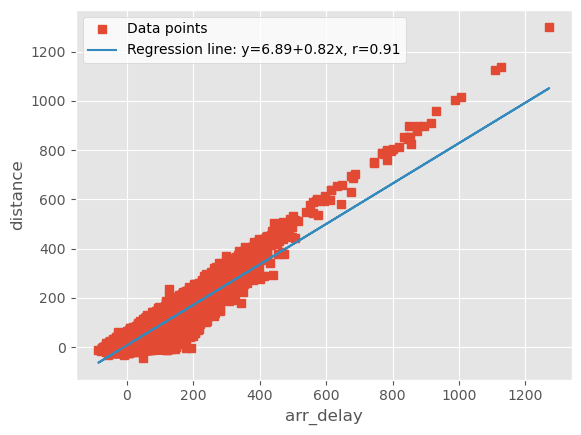

In [41]:
# (Python, 2023)
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker="s", label="Data points")
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel("arr_delay")
ax.set_ylabel("distance")
ax.legend(facecolor="white")
plt.show()

#### Random Forest Classification

In [42]:
# # find target
# dfn["delayed"].value_counts()
# sns.countplot(dfn.delayed)
# plt.xlabel("delayed")
# plt.ylabel("count of target")
# plt.title("delayed target count plot")
# plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7ff123a78670> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7ff123a96940> (for post_execute):


KeyboardInterrupt: 

In [ ]:
dfn2 = dfn.drop(
    columns=["dep_time", "arr_time", "sched_dep_time", "sched_arr_time"], axis=1
)

In [ ]:
X = dfn2.iloc[:, dfn2.columns != "delayed"]
y = dfn2.iloc[:, dfn2.columns == "delayed"]

In [ ]:
# (Stats Wire, 2021)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

In [ ]:
X_train.sample(10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(
    criterion="gini",  # <-- purity
    max_depth=8,  # <-- depth of tree
    min_samples_split=10,  # <-- the min number of samples to split the new branch
    random_state=10,
)

In [ ]:
clf.fit(X_train, y_train)